In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium
import folium.plugins as plugins

In [104]:
df=pd.read_csv('listings.csv')

/Users/chenyichang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# df=df.drop('listing_url',axis=1)
# df=df.drop('scrape_id',axis=1)
# df=df.drop('last_scraped',axis=1)
# df=df.drop('summary',axis=1)
# df=df.drop('description',axis=1)
# df=df.drop('experiences_offered',axis=1)
# df=df.drop('neighborhood_overview',axis=1)
# df=df.drop('notes',axis=1)
# df=df.drop('transit',axis=1)
# df=df.drop('access',axis=1)
# df=df.drop('interaction',axis=1)
# df=df.drop('house_rules',axis=1)
# df=df.drop('thumbnail_url',axis=1)
# df=df.drop('medium_url',axis=1)
# df=df.drop('picture_url',axis=1)
# df=df.drop('xl_picture_url',axis=1)

In [ ]:
# df=df.drop('host_name',axis=1)
# df=df.drop('host_url',axis=1)
# df=df.drop('host_about',axis=1)
# df=df.drop('host_response_time',axis=1)
# df=df.drop('host_response_rate',axis=1)
# df=df.drop('host_acceptance_rate',axis=1)
# df=df.drop('host_thumbnail_url',axis=1)
# df=df.drop('host_picture_url',axis=1)
# df=df.drop('host_verifications',axis=1)
# df=df.drop('host_has_profile_pic',axis=1)
# df=df.drop('host_identity_verified',axis=1)

In [105]:
df=df[df['neighbourhood_group_cleansed']=='Manhattan']
df=df[['host_is_superhost','neighbourhood_cleansed','property_type','room_type','accommodates','bathrooms','bedrooms','beds','price','cancellation_policy','latitude','longitude']]

In [106]:
df=df.dropna(how='any')
df['price'] = df['price'].str.replace(",", "")
df['price'] = df['price'].str.replace("$", "").astype(float)

In [79]:
df.head()

,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,cancellation_policy,latitude,longitude
1,t,Harlem,Apartment,Private room,3,1.0,1.0,3.0,59.0,strict_14_with_grace_period,40.799205,-73.953676
3,f,Midtown,Apartment,Entire home/apt,2,1.0,0.0,1.0,225.0,strict_14_with_grace_period,40.753621,-73.983774
7,f,Harlem,Apartment,Private room,2,1.0,1.0,1.0,150.0,strict_14_with_grace_period,40.809018,-73.941902
11,f,Hell's Kitchen,Apartment,Private room,1,1.0,1.0,1.0,52.0,strict_14_with_grace_period,40.759786,-73.991193
13,t,East Village,Apartment,Private room,2,1.0,1.0,1.0,80.0,strict_14_with_grace_period,40.726488,-73.979035


In [80]:
df.describe()

,accommodates,bathrooms,bedrooms,beds,price,latitude,longitude
count,23409.000000,23409.000000,23409.000000,23409.000000,23409.000000,23409.000000,23409.000000
mean,2.909308,1.122325,1.119228,1.560767,192.859755,40.765023,-73.974538
std,1.795111,0.381675,0.748325,0.989776,253.323917,0.037884,0.021753
min,1.000000,0.000000,0.000000,0.000000,0.000000,40.701571,-74.018449
25%,2.000000,1.000000,1.000000,1.000000,95.000000,40.732230,-73.991468
50%,2.000000,1.000000,1.000000,1.000000,150.000000,40.760843,-73.980361
75%,4.000000,1.000000,1.000000,2.000000,220.000000,40.794692,-73.954207
max,16.000000,6.500000,8.000000,16.000000,10000.000000,40.876646,-73.908550


In [ ]:
# prepare latitude and longitude data per trip per hour
data=list()

data.append([[df.iloc[j]['latitude'],df.iloc[j]['longitude']]for j in range(len(df))])

weight = 1  # default value
for time_entry in data:
    for row in time_entry:
        row.append(weight)

In [ ]:
m = folium.Map([40.7204, -73.9280], tiles='stamentoner', zoom_start=12)

hm = plugins.HeatMapWithTime(data)

hm.add_to(m)

m

In [ ]:
df['price'].hist(bins=50,range=(0,1300))
plt.ylabel('Count')
plt.xlabel('Listing price($)')
plt.title('Distribution of listing prices')

In [ ]:
df['price'].hist(bins=50,range=(0,600))
plt.ylabel('Count')
plt.xlabel('Listing price($)')
plt.title('Distribution of listing prices')

In [ ]:
df.pivot(columns = 'bedrooms',values = 'price').plot.hist(stacked = True,bins=100,range=(0,600))
plt.xlabel('Listing price($)')

In [ ]:
df.pivot(columns = 'accommodates',values = 'price').plot.hist(stacked = True,bins=100,range=(0,600))
plt.xlabel('Listing price($)')

In [ ]:
plt.scatter(df['price'],df['bedrooms'])
plt.ylabel('bedrooms')
plt.xlabel('Listing price($)')
plt.title('No. of bedrooms vs price')

# Defining a Function to Calculate the Adjusted  R2 

In [107]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

# Single Regression

In [108]:
df=df[df['price']<2000]

In [109]:
evaluation=pd.DataFrame(columns=["Model","Details","Mean Squared Error","R-squared-training","Adjusted R-squared-training","R-squared-test","Adjusted R-squared-test"])

In [110]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lr
from sklearn import metrics

In [111]:
train,test = train_test_split(df,train_size = 0.7,random_state=0)
simple=lr.LinearRegression()
train_x = np.array(train['bedrooms'], dtype=pd.Series).reshape(-1,1)
train_y = np.array(train['price'], dtype=pd.Series)
simple.fit(train_x,train_y)

test_x = np.array(test['bedrooms'], dtype=pd.Series).reshape(-1,1)
test_y = np.array(test['price'], dtype=pd.Series)

pred = simple.predict(test_x)
msesm = format(np.sqrt(metrics.mean_squared_error(test_y,pred)),'.3f')
rtrsm = format(simple.score(train_x, train_y),'.3f')
rtesm = format(simple.score(test_x, test_y),'.3f')

print ("Average Price for Test Data: {:.3f}".format(test_y.mean()))
print('Intercept: {}'.format(simple.intercept_))
print('Coefficient: {}'.format(simple.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Regression','-',msesm,rtrsm,'-',rtesm,'-']
evaluation

Average Price for Test Data: 184.214
Intercept: 88.28754830116813
Coefficient: [85.99779918]


/Users/chenyichang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,Model,Details,Mean Squared Error,R-squared-training,Adjusted R-squared-training,R-squared-test,Adjusted R-squared-test
0,Simple Regression,-,145.643,0.169,-,0.179,-


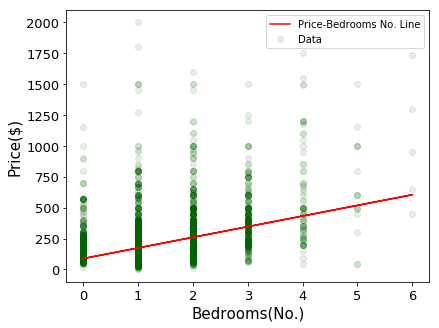

In [112]:
plt.figure(figsize=(6.5,5))
plt.scatter(test_x,test_y,color='darkgreen',label="Data", alpha=.1)
plt.plot(test_x,simple.predict(test_x),color="red",label="Price-Bedrooms No. Line")
plt.xlabel("Bedrooms(No.)", fontsize=15)
plt.ylabel("Price($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

# Multiple regression

<li>Pearson Correlation Matrix</li>
<ul>
<li>If a feature does not improve your model a lot, not adding it may be a better choice. Besides, when it comes to correlation, if there is very high correlation between two features, then keeping both of them is not a good idea most of the time. 

In [113]:
df['host_is_superhost']=np.where(df['host_is_superhost']=='t',1,0)

#Set dummy variables of property type. The remaining type includes hotel, Resort and so on...(<10%)
df['if Apartment']=np.where(df['property_type']=='Apartment',1,0)
df['if House']=np.where(df['property_type']=='House',1,0)
df['if Loft']=np.where(df['property_type']=='Loft',1,0)

#Set dummy variables of room type. The remaining room type is shared room.
df['if Private room']=np.where(df['room_type']=='Private room',1,0)
df['if Entire home/apt']=np.where(df['room_type']=='Entire home/apt',1,0) 

# Set numerical variable for cancellation_policy accoring to cancellation flexibility
def cancellation_score(x):
    if x=='strict':
        return 1
    elif x=='super_strict_60':
        return 2
    elif x=='super_strict_30':
        return 3
    elif x=='strict_14_with_grace_period':
        return 4
    elif x=='moderate':
        return 5
    elif x=='flexible':
        return 6
df['cancellation_score']=df['cancellation_policy'].apply(lambda x:cancellation_score(x))

# Combine neighbors into 7 major districts
def district(neigh):
    if neigh in {'Harlem','East Harlem','Inwood','Washington Heights','Morningside Heights','Marble Hill'}:
        return 'Upper Manhattan'
    elif neigh in {'Upper West Side'}:
        return 'Upper West Manhattan'
    elif neigh in {'Upper East Side','Roosevelt Island'}:
        return 'Upper East Manhattan'
    elif neigh in {"Hell's Kitchen",'Chelsea','Theater District'}:
        return 'Mid West Manhattan'
    elif neigh in {'Midtown','Flatiron District'}:
        return 'Mid Manhattan'
    elif neigh in {'Murray Hill','Kips Bay','Gramercy','Stuyvesant Town'}:
        return 'Mid East Manhattan'
    else:
        return 'Lower Manhattan'

df['district']=df['neighbourhood_cleansed'].apply(lambda x:district(x))
# Set dummy variables for districts.
df['if Upper Manhattan']=np.where(df['district']=='Upper Manhattan',1,0)
df['if Upper East Manhattan']=np.where(df['district']=='Upper East Manhattan',1,0)
df['if Mid West Manhattan']=np.where(df['district']=='Mid West Manhattan',1,0)
df['if Mid Manhattan']=np.where(df['district']=='Mid Manhattan',1,0)
df['if Mid East Manhattan']=np.where(df['district']=='Mid East Manhattan',1,0)
df['if Lower Manhattan']=np.where(df['district']=='Lower Manhattan',1,0)

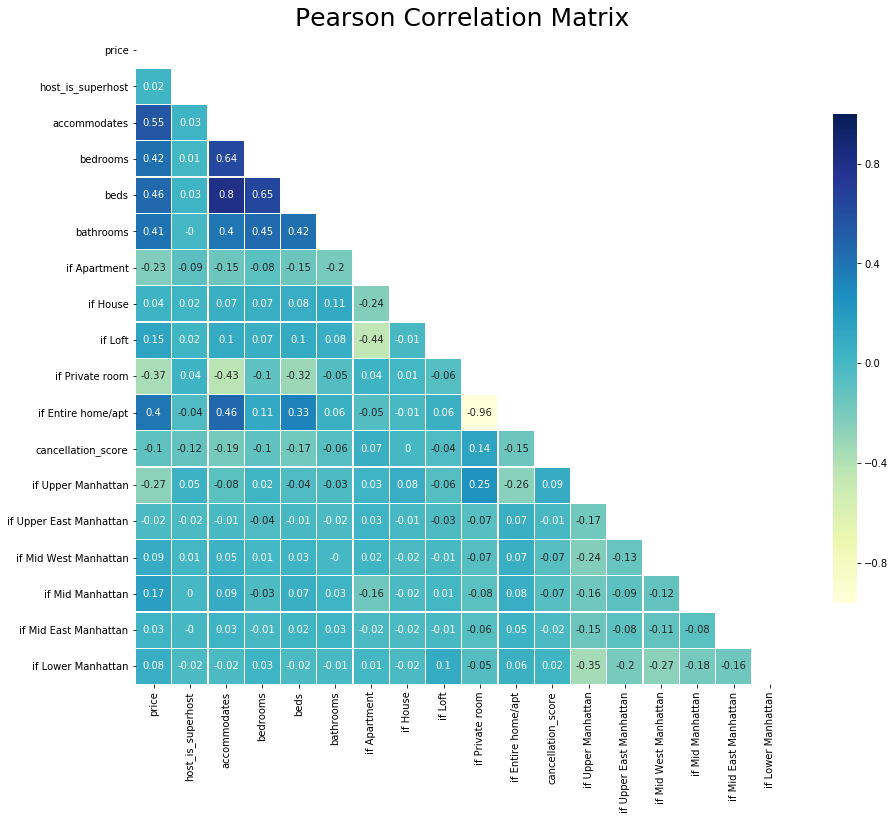

In [114]:
features = ['price',
'host_is_superhost',
'accommodates',
'bedrooms',
'beds',
'bathrooms',
'if Apartment',
'if House',
'if Loft',
'if Private room',
'if Entire home/apt',
'cancellation_score',
'if Upper Manhattan',
'if Upper East Manhattan',
'if Mid West Manhattan',
'if Mid Manhattan',
'if Mid East Manhattan',
'if Lower Manhattan']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr().round(2),linewidths=0.25,vmax=1.0,square=True,cmap="YlGnBu", 
            linecolor='w',annot=True,mask=mask,cbar_kws={"shrink": .75})

<li>boxplot

[Text(0.5,0,'\nAccommodates'), Text(0.5,0,'\nBeds'), Text(0.5,0,'\nBedrooms')]

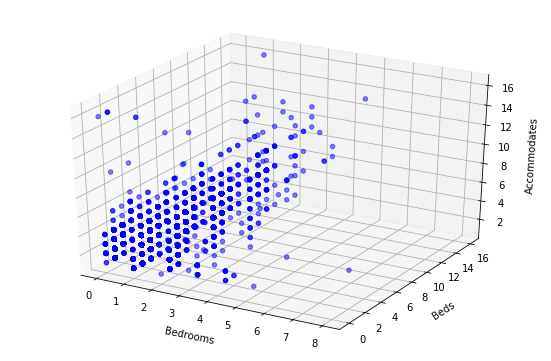

In [115]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(9.5,6.25))
ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(train['bedrooms'],train['beds'],train['accommodates'],c="blue",alpha=.5)
ax.set(xlabel='\nBedrooms',ylabel='\nBeds',zlabel='\nAccommodates')

[Text(0,0.5,'Price'), Text(0.5,0,'Accommodates')]

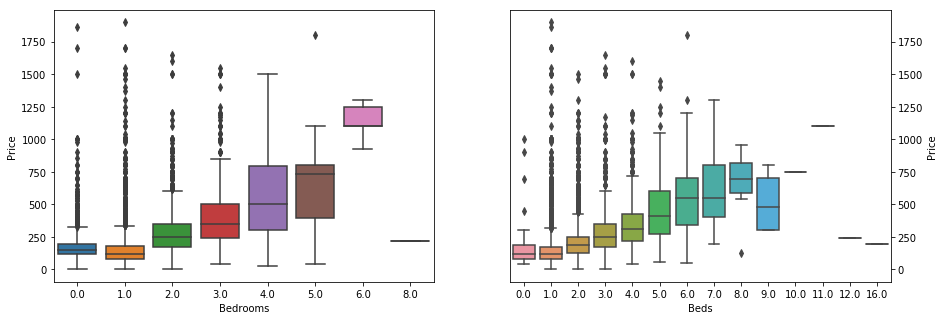

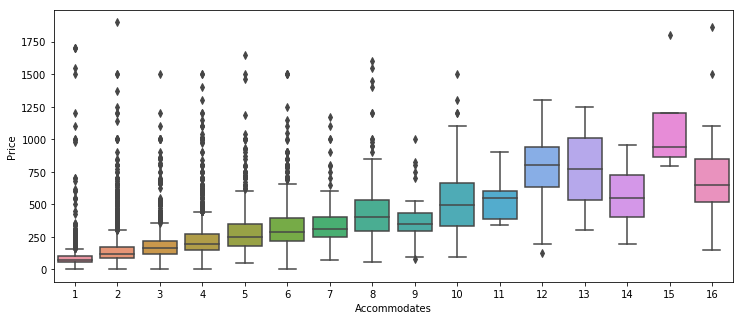

In [90]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=train['bedrooms'],y=train['price'], ax=axes[0])
sns.boxplot(x=train['beds'],y=train['price'], ax=axes[1])
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Beds', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=train['accommodates'],y=train['price'], ax=axe)
axe.set(xlabel='Accommodates', ylabel='Price')

<li>delete bedrooms and beds varibale

In [116]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lr
from sklearn import metrics

train_data,test_data = train_test_split(df,train_size = 0.7,random_state=0)
features1 = [
'host_is_superhost',
'accommodates',
'bathrooms',
'if Apartment',
'if House',
'if Loft',
'if Private room',
'if Entire home/apt',
'cancellation_score',
'if Upper Manhattan',
'if Upper East Manhattan',
'if Mid West Manhattan',
'if Mid Manhattan',
'if Mid East Manhattan',
'if Lower Manhattan']

x_train = train_data[features1]
y_train = train_data['price']
x_test = test_data[features1]
y_test = test_data['price']

complex_model_1 = lr.LinearRegression()
complex_model_1.fit(x_train,y_train)

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred1 = complex_model_1.predict(x_test)
msecm1 = format(np.sqrt(metrics.mean_squared_error(y_test,pred1)),'.3f')
rtrcm1 = format(complex_model_1.score(x_train,y_train),'.3f')
artrcm1 = format(adjustedR2(complex_model_1.score(x_train,y_train),train_data.shape[0],len(features1)),'.3f')
rtecm1 = format(complex_model_1.score(x_test,y_test),'.3f')
artecm1 = format(adjustedR2(complex_model_1.score(x_test,y_test),test_data.shape[0],len(features1)),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression','-',msecm1,rtrcm1,artrcm1,rtecm1,artecm1 ]
evaluation

Intercept: -51.97351391968624
Coefficients: [  5.66422377  29.96955579  95.92223562 -48.91869858 -41.03393894
  37.08382637  17.56060732  72.37401772   6.195296   -46.9467471
  -3.89458049  31.06116463  58.64096655   9.67822798  18.79272354]


/Users/chenyichang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,Model,Details,Mean Squared Error,R-squared-training,Adjusted R-squared-training,R-squared-test,Adjusted R-squared-test
0,Simple Regression,-,145.643,0.169,-,0.179,-
1,Multiple Regression,-,119.622,0.436,0.436,0.446,0.445


In [92]:
import statsmodels.api as sm
x_train=sm.add_constant(x_train)
regressor_OLS = sm.OLS(y_train, x_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     841.4
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:13:59   Log-Likelihood:            -1.0077e+05
No. Observations:               16342   AIC:                         2.016e+05
Df Residuals:                   16326   BIC:                         2.017e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -51.9735      9.813     -5.297      0.000     -71.207     -32.740
host_is_superhost           5.6642      2.635      2.149      0.032       0.498      10.830
accommodates               29.9696      0.648     46.237      0.000      28.699      31.240
bathrooms                  95.9222      2.741     34.990      0.000      90.549     101.296
if Apartment              -48.9187      3.508    -13.947      0.000     -55.794     -42.043
if House                  -41.0339     11.334     -3.620      0.000     -63.251     -18.817
if Loft                    37.0838      6.944      5.340      0.000      23.472      50.695
if Private room            17.5606      6.450      2.722      0.006       4.917      30.204
if Entire home/apt         72.3740      6.491     11.149      0.000      59.650      85.098
cancellation_score          6.1953      1.046      5.925      0.000       4.146       8.245
if Upper Manhattan        -46.9467      3.518    -13.346      0.000     -53.842     -40.052
if Upper East Manhattan    -3.8946      4.240     -0.919      0.358     -12.205       4.416
if Mid West Manhattan      31.0612      3.742      8.300      0.000      23.726      38.396
if Mid Manhattan           58.6410      4.407     13.308      0.000      50.004      67.278
if Mid East Manhattan       9.6782      4.652      2.081      0.037       0.561      18.796
if Lower Manhattan         18.7927      3.404      5.520      0.000      12.120      25.466
==============================================================================
Omnibus:                    14940.279   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           946089.931
Skew:                           4.221   Prob(JB):                         0.00
Kurtosis:                      39.307   Cond. No.                         82.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Polynomial Regression

In [117]:
from sklearn.preprocessing import PolynomialFeatures

In [118]:
train_data,test_data = train_test_split(df,train_size = 0.7,random_state=0)
features1 = [
'host_is_superhost',
'accommodates',
'bathrooms',
'if Apartment',
'if House',
'if Loft',
'if Private room',
'if Entire home/apt',
'cancellation_score',
'if Upper Manhattan',
'if Upper East Manhattan',
'if Mid West Manhattan',
'if Mid Manhattan',
'if Mid East Manhattan',
'if Lower Manhattan']

x_train = train_data[features1]
y_train = train_data['price']
x_test = test_data[features1]
y_test = test_data['price']

/Users/chenyichang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [119]:
# Polynomial Regression with degree 2
polyfeat = PolynomialFeatures(degree=2)
X_trainpoly = polyfeat.fit_transform(x_train)
X_testpoly = polyfeat.fit_transform(x_test)
poly = lr.LinearRegression().fit(X_trainpoly, y_train)

predp = poly.predict(X_testpoly)
msepoly1 = format(np.sqrt(metrics.mean_squared_error(y_test,predp)),'.3f')
rtrpoly1 = format(poly.score(X_trainpoly,y_train),'.3f')
rtepoly1 = format(poly.score(X_testpoly,y_test),'.3f')
artrpoly1 = format(adjustedR2(poly.score(X_trainpoly,y_train),train_data.shape[0],len(features1)),'.3f')
artepoly1 = format(adjustedR2(poly.score(X_testpoly,y_test),test_data.shape[0],len(features1)),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Polynomial Regression','degree=2',msepoly1,rtrpoly1,artrpoly1,rtepoly1,artepoly1]
evaluation

,Model,Details,Mean Squared Error,R-squared-training,Adjusted R-squared-training,R-squared-test,Adjusted R-squared-test
0,Simple Regression,-,145.643,0.169,-,0.179,-
1,Multiple Regression,-,119.622,0.436,0.436,0.446,0.445
2,Polynomial Regression,degree=2,115.385,0.495,0.494,0.485,0.484


In [120]:
# Polynomial Regression with degree 3
polyfeat = PolynomialFeatures(degree=3)
X_trainpoly = polyfeat.fit_transform(x_train)
X_testpoly = polyfeat.fit_transform(x_test)
poly = lr.LinearRegression().fit(X_trainpoly, y_train)

predp = poly.predict(X_testpoly)
msepoly1 = format(np.sqrt(metrics.mean_squared_error(y_test,predp)),'.3f')
rtrpoly1 = format(poly.score(X_trainpoly,y_train),'.3f')
rtepoly1 = format(poly.score(X_testpoly,y_test),'.3f')
artrpoly1 = format(adjustedR2(poly.score(X_trainpoly,y_train),train_data.shape[0],len(features1)),'.3f')
artepoly1 = format(adjustedR2(poly.score(X_testpoly,y_test),test_data.shape[0],len(features1)),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Polynomial Regression','degree=3',msepoly1,rtrpoly1,artrpoly1,rtepoly1,artepoly1]
evaluation

,Model,Details,Mean Squared Error,R-squared-training,Adjusted R-squared-training,R-squared-test,Adjusted R-squared-test
0,Simple Regression,-,145.643,0.169,-,0.179,-
1,Multiple Regression,-,119.622,0.436,0.436,0.446,0.445
2,Polynomial Regression,degree=2,115.385,0.495,0.494,0.485,0.484
3,Polynomial Regression,degree=3,116.503,0.540,0.539,0.475,0.474


In [121]:
evaluation.sort_values(by = 'R-squared-test', ascending=False)

,Model,Details,Mean Squared Error,R-squared-training,Adjusted R-squared-training,R-squared-test,Adjusted R-squared-test
2,Polynomial Regression,degree=2,115.385,0.495,0.494,0.485,0.484
3,Polynomial Regression,degree=3,116.503,0.540,0.539,0.475,0.474
1,Multiple Regression,-,119.622,0.436,0.436,0.446,0.445
0,Simple Regression,-,145.643,0.169,-,0.179,-


# k-nearest neighbors (KNN) algorithm

In [122]:
features2= [
'host_is_superhost',
'accommodates',
'bathrooms',
'if Apartment',
'if House',
'if Loft',
'if Private room',
'if Entire home/apt',
'cancellation_score',
'if Upper Manhattan',
'if Upper East Manhattan',
'if Mid West Manhattan',
'if Mid Manhattan',
'if Mid East Manhattan',
'if Lower Manhattan']

In [123]:
from sklearn.neighbors import KNeighborsRegressor

In [125]:
for n in range(5,35,5):
    knnreg = KNeighborsRegressor(n_neighbors=n)
    knnreg.fit(train_data[features2],train_data['price'])
    pred = knnreg.predict(test_data[features2])

    mseknn1 = format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f')
    rtrknn1 = format(knnreg.score(train_data[features2],train_data['price']),'.3f')
    artrknn1 = format(adjustedR2(knnreg.score(train_data[features2],train_data['price']),train_data.shape[0],len(features2)),'.3f')
    rteknn1 = format(knnreg.score(test_data[features2],test_data['price']),'.3f')
    arteknn1 = format(adjustedR2(knnreg.score(test_data[features2],test_data['price']),test_data.shape[0],len(features2)),'.3f')

    r = evaluation.shape[0]
    evaluation.loc[r] = ['KNN Regression','n_neighbors='+str(n),mseknn1,rtrknn1,artrknn1,rteknn1,arteknn1]

In [127]:
evaluation.sort_values(by = 'R-squared-test', ascending=False)

,Model,Details,Mean Squared Error,R-squared-training,Adjusted R-squared-training,R-squared-test,Adjusted R-squared-test
2,Polynomial Regression,degree=2,115.385,0.495,0.494,0.485,0.484
3,Polynomial Regression,degree=3,116.503,0.540,0.539,0.475,0.474
5,KNN Regression,n_neighbors=10,116.430,0.509,0.508,0.475,0.474
8,KNN Regression,n_neighbors=25,116.510,0.491,0.491,0.475,0.474
7,KNN Regression,n_neighbors=20,116.555,0.493,0.493,0.474,0.473
9,KNN Regression,n_neighbors=30,116.539,0.488,0.488,0.474,0.473
6,KNN Regression,n_neighbors=15,117.171,0.495,0.495,0.469,0.468
4,KNN Regression,n_neighbors=5,118.600,0.527,0.526,0.456,0.455
1,Multiple Regression,-,119.622,0.436,0.436,0.446,0.445
0,Simple Regression,-,145.643,0.169,-,0.179,-


# Cleaning Data & Combining District

In [1]:
import sklearn

In [2]:
def district(neigh):
    if neigh in {'Harlem','East Harlem','Inwood','Washington Heights','Morningside Heights','Marble Hill'}:
        return 'Upper Manhattan'
    elif neigh in {'Upper West Side'}:
        return 'Upper West Manhattan'
    elif neigh in {'Upper East Side','Roosevelt Island'}:
        return 'Upper East Manhattan'
    elif neigh in {"Hell's Kitchen",'Chelsea','Theater District'}:
        return 'Mid West Manhattan'
    elif neigh in {'Midtown','Flatiron District'}:
        return 'Mid Manhattan'
    elif neigh in {'Murray Hill','Kips Bay','Gramercy','Stuyvesant Town'}:
        return 'Mid East Manhattan'
    else:
        return 'Lower Manhattan'

In [3]:
import pandas as pd
df = pd.read_csv('/Users/dingranlu/Documents/E4523/Airbnb/listings.csv', encoding = "ISO-8859-1")
df = df[df['neighbourhood_group_cleansed'] == 'Manhattan']
df['neighbourhood'] = df['neighbourhood_cleansed'].apply(district)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
def cancellation_score(x):
    if x=='strict':
        return 0
    elif x=='super_strict_60':
        return 1
    elif x=='super_strict_30':
        return 2
    elif x=='strict_14_with_grace_period':
        return 3
    elif x=='moderate':
        return 4
    elif x=='flexible':
        return 5
df['cancellation_score']=df['cancellation_policy'].apply(lambda x:cancellation_score(x))

In [5]:
df = df[['neighbourhood','property_type','room_type','accommodates','bathrooms','instant_bookable','cancellation_score','price']]

In [6]:
var = ['neighbourhood','property_type','room_type','instant_bookable']
df_ = pd.get_dummies(df, columns = var)
df_=df_.dropna()

In [7]:
columns = ['accommodates', 'bathrooms',
           'neighbourhood_Lower Manhattan', 'neighbourhood_Mid East Manhattan',
           'neighbourhood_Mid Manhattan', 'neighbourhood_Mid West Manhattan',
           'neighbourhood_Upper East Manhattan', 'neighbourhood_Upper Manhattan',
           'property_type_Aparthotel', 'property_type_Apartment', 
           'property_type_Bed and breakfast', 'property_type_Boutique hotel', 
           'property_type_Condominium', 'property_type_Villa',
           'property_type_Guest suite', 'property_type_Hostel',
           'property_type_House', 'property_type_Loft', 
           'property_type_Resort', 'property_type_Serviced apartment',
           'property_type_Tiny house', 'property_type_Townhouse',
           'room_type_Entire home/apt', 'room_type_Private room',
           'instant_bookable_t', 'cancellation_score', 'price']
df_ = df_[columns]

Text(0.5,1,'Histogram')

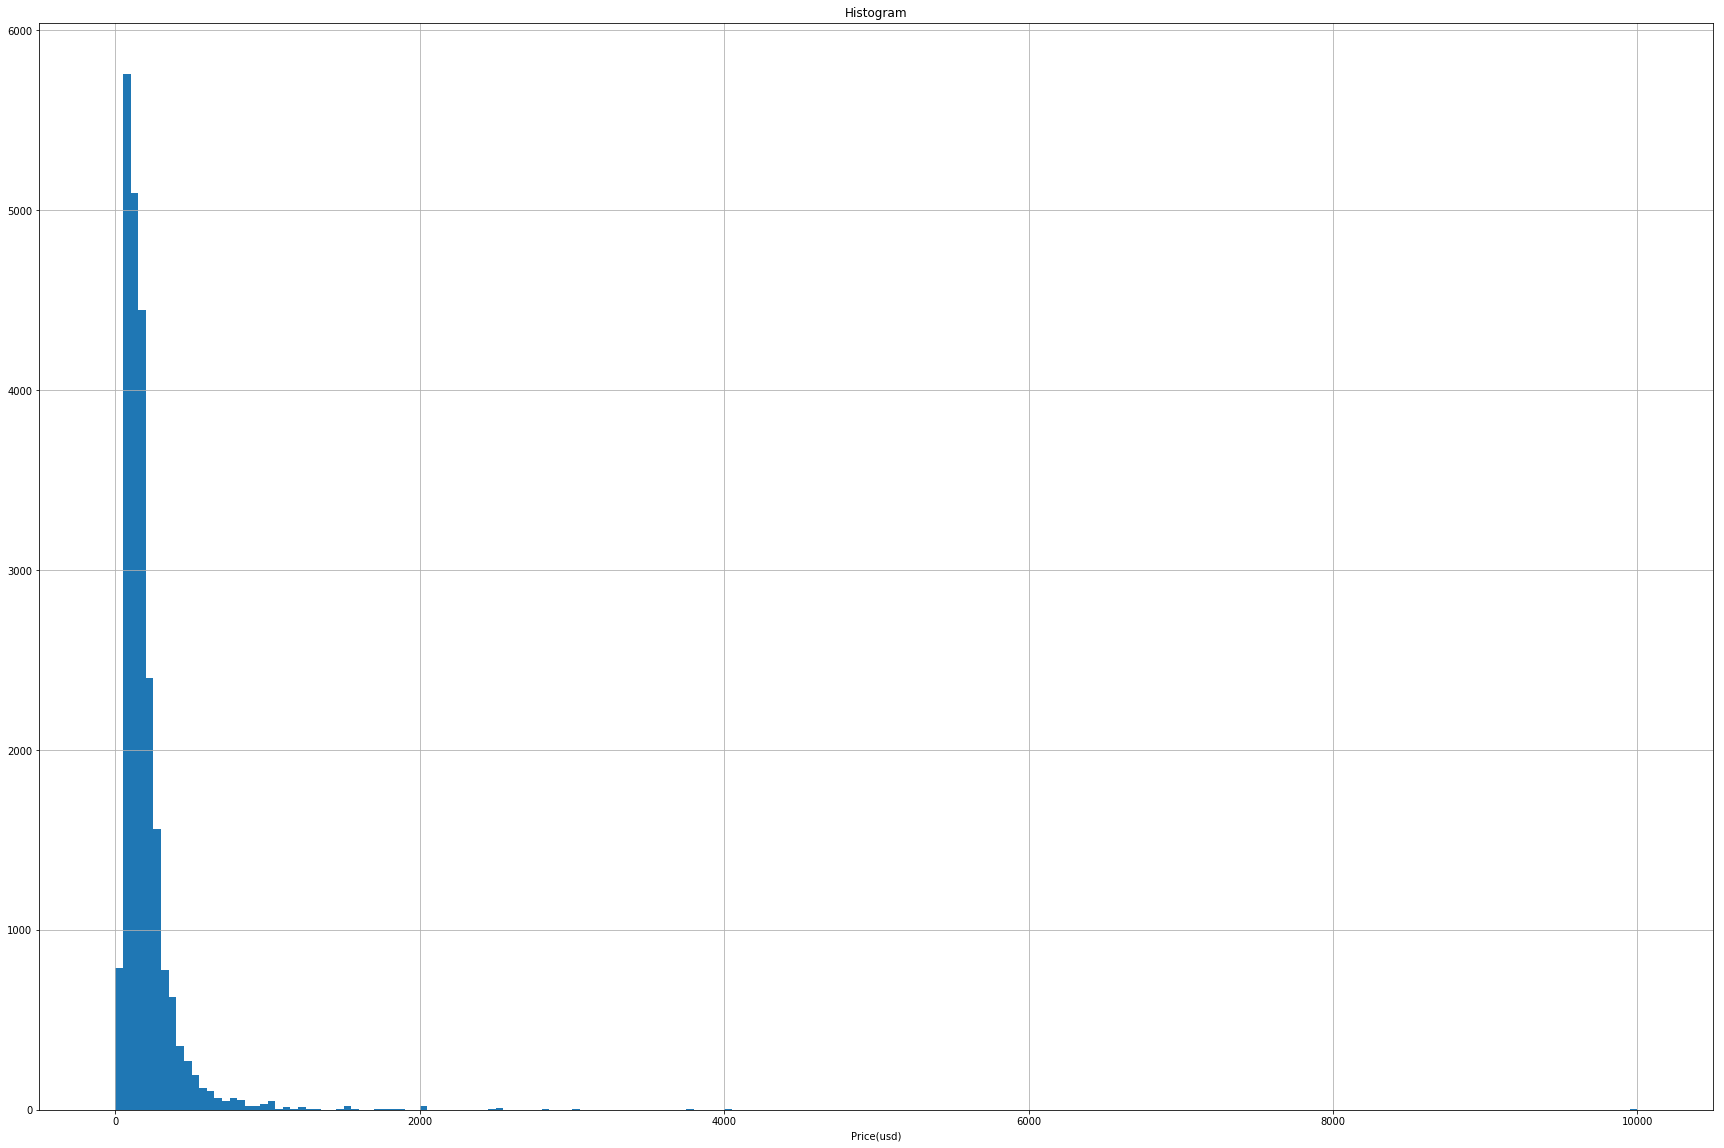

In [9]:
import matplotlib.pyplot as plt
df_.price.hist(bins=200, figsize=(30,20))
plt.xlabel('Price(usd)')
plt.title('Histogram')

In [10]:
df_ = df_[df_['price'] <= 2000]

# Regressor Tree

In [11]:
from sklearn.model_selection import train_test_split
train_1, test_1 = train_test_split(df_, test_size = 0.3)
x_train_1 = train_1.iloc[0:,0:26]
y_train_1 = train_1[['price']]
x_test_1 = test_1.iloc[0:,0:26]
y_test_1 = test_1[['price']]

Maximum depth: 1
Training R-Square 0.1715305327890316
Testing R-Square 0.19187095191873116
Maximum depth: 2
Training R-Square 0.30767383859353414
Testing R-Square 0.3399917483507181
Maximum depth: 3
Training R-Square 0.37926669916764366
Testing R-Square 0.38586932649273714
Maximum depth: 4
Training R-Square 0.42297054371233045
Testing R-Square 0.4290173081453795
Maximum depth: 5
Training R-Square 0.4591575599831256
Testing R-Square 0.43145957688598074
Maximum depth: 6
Training R-Square 0.4954222298193608
Testing R-Square 0.43739772860240445
Maximum depth: 7
Training R-Square 0.5218214280737224
Testing R-Square 0.43052133085250255
Maximum depth: 8
Training R-Square 0.5485098971559585
Testing R-Square 0.3977379558306637
Maximum depth: 9
Training R-Square 0.5749622257517435
Testing R-Square 0.3981594042606693


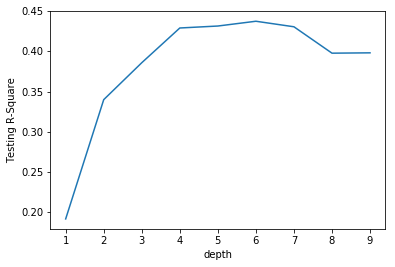

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
x = []
y = []
for i in range(1,10):
    model = tree.DecisionTreeRegressor(max_depth=i)
    model.fit(x_train_1,y_train_1)
    x.append(i)
    y.append(model.score(x_test_1,y_test_1))
    print ("Maximum depth:",i)
    print("Training R-Square",model.score(x_train_1,y_train_1))
    print("Testing R-Square",model.score(x_test_1,y_test_1))
plt.plot(x,y)
plt.xlabel('depth')
plt.ylabel('Testing R-Square')
plt.show()

In [13]:
model_1 = tree.DecisionTreeRegressor(max_depth=4)
model_1.fit(x_train_1,y_train_1)
print ("Maximum depth:",4)
print("Training R-Square",model_1.score(x_train_1,y_train_1))
print("Testing R-Square",model_1.score(x_test_1,y_test_1))

Maximum depth: 4
Training R-Square 0.42297054371233045
Testing R-Square 0.4290173081453795


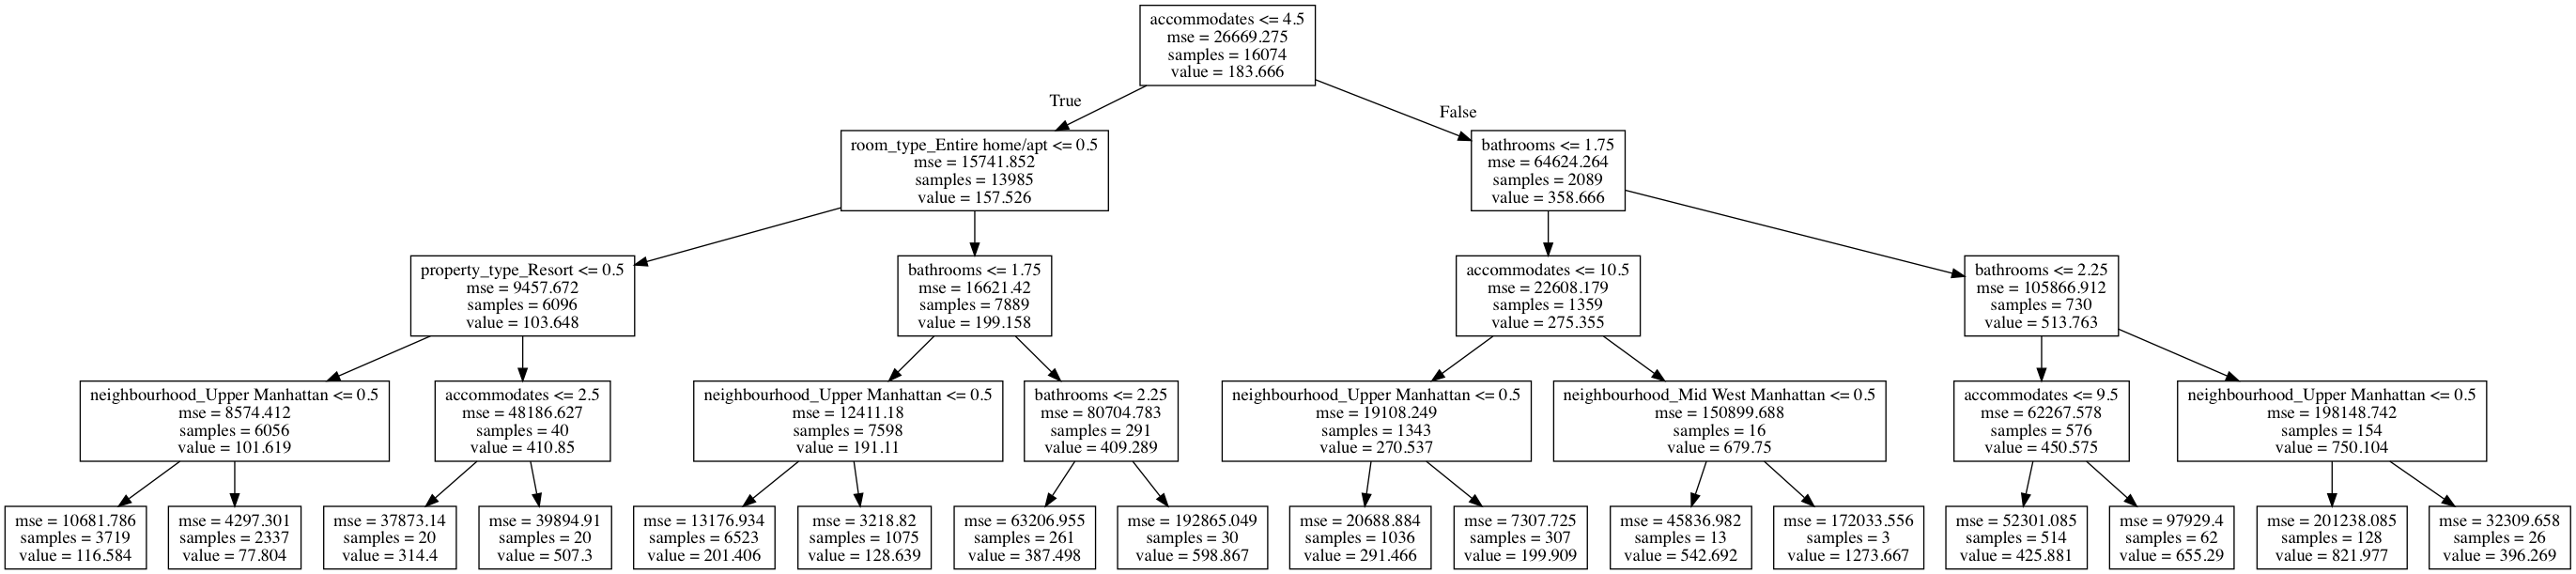

In [14]:
feature_names = ['accommodates', 'bathrooms',
           'neighbourhood_Lower Manhattan', 'neighbourhood_Mid East Manhattan',
           'neighbourhood_Mid Manhattan', 'neighbourhood_Mid West Manhattan',
           'neighbourhood_Upper East Manhattan', 'neighbourhood_Upper Manhattan',
           'property_type_Aparthotel', 'property_type_Apartment', 
           'property_type_Bed and breakfast', 'property_type_Boutique hotel', 
           'property_type_Condominium', 'property_type_Villa',
           'property_type_Guest suite', 'property_type_Hostel',
           'property_type_House', 'property_type_Loft', 
           'property_type_Resort', 'property_type_Serviced apartment',
           'property_type_Tiny house', 'property_type_Townhouse',
           'room_type_Entire home/apt', 'room_type_Private room',
           'instant_bookable_t', 'cancellation_score']
from IPython.display import Image
dot_data = tree.export_graphviz(model_1, out_file=None,feature_names=feature_names)
import pydotplus

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

Text(0.5,0,'Relative Importance')

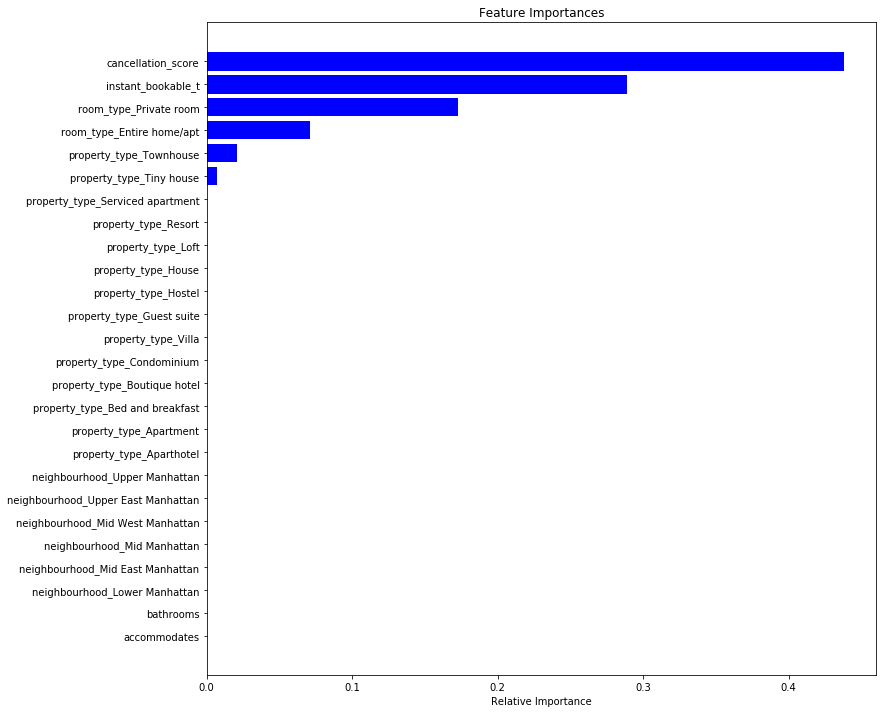

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = model_1.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),feature_names)
plt.xlabel('Relative Importance')

# Classify the Price Into 21 Intervals from 0 - 2000 USD

In [19]:
def price_interval(price):
    interval = np.linspace(0,2000,21)
    for i in range(len(interval)-1):
        if price >= interval[i] and price < interval[i+1]:
            return i
        elif price == 2000:
            return 20
        else:
            continue

In [20]:
df_['price interval'] = df_['price'].apply(price_interval)

# Classifier Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

train_2, test_2 = train_test_split(df_, test_size = 0.3)
x_train_2 = train_2.iloc[0:,0:26]
y_train_2 = train_2[['price interval']]
x_test_2 = test_2.iloc[0:,0:26]
y_test_2 = test_2[['price interval']]

Maximum depth: 1
Training R-Square 0.5397536394176932
Testing R-Square 0.5403483309143686
Maximum depth: 2
Training R-Square 0.5510140599726266
Testing R-Square 0.5470246734397678
Maximum depth: 3
Training R-Square 0.5628343909418937
Testing R-Square 0.5599419448476052
Maximum depth: 4
Training R-Square 0.5642652731118577
Testing R-Square 0.5664731494920174
Maximum depth: 5
Training R-Square 0.5736593256190121
Testing R-Square 0.5730043541364296
Maximum depth: 6
Training R-Square 0.5797561279084236
Testing R-Square 0.5712626995645863
Maximum depth: 7
Training R-Square 0.5904566380490233
Testing R-Square 0.5724238026124818
Maximum depth: 8
Training R-Square 0.5990419310688068
Testing R-Square 0.5741654571843251
Maximum depth: 9
Training R-Square 0.6066940400647007
Testing R-Square 0.5724238026124818


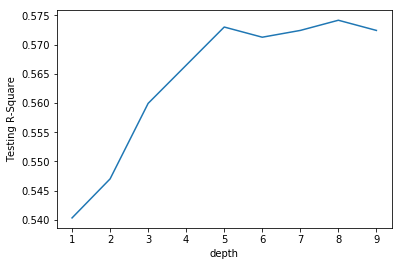

In [27]:
x_ = []
y_ = []

for i in range(1,10):
    model_ = tree.DecisionTreeClassifier(max_depth = i,criterion='entropy')
    model_.fit(x_train_2,y_train_2)
    
    x_.append(i)
    y_.append(model_.score(x_test_2,y_test_2))
    print ("Maximum depth:",i)
    print("Training R-Square",model_.score(x_train_2,y_train_2))
    print("Testing R-Square",model_.score(x_test_2,y_test_2))
plt.plot(x_,y_)
plt.xlabel('depth')
plt.ylabel('Testing R-Square')
plt.show()

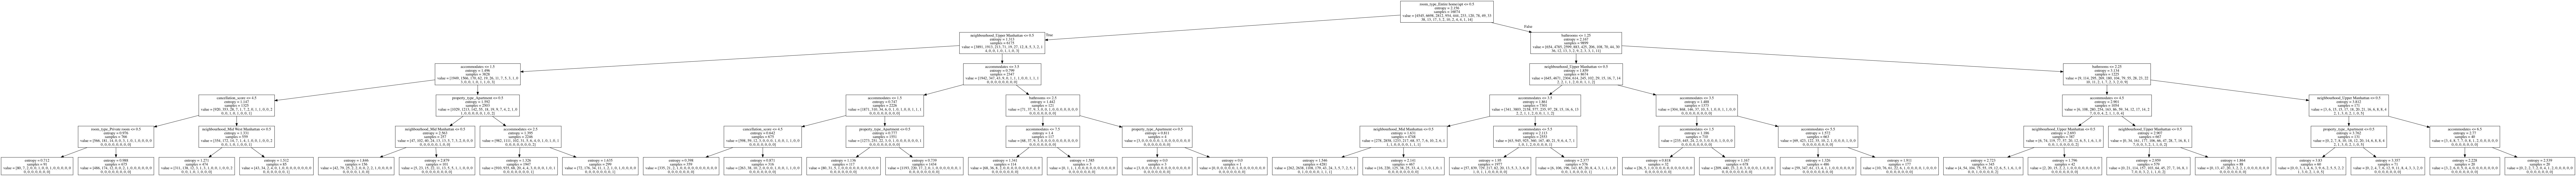

In [23]:
model_2 = tree.DecisionTreeClassifier(max_depth = 5,criterion='entropy')
model_2.fit(x_train_2,y_train_2)
import pydotplus 
from IPython.display import Image
feature_names = ['accommodates', 'bathrooms',
           'neighbourhood_Lower Manhattan', 'neighbourhood_Mid East Manhattan',
           'neighbourhood_Mid Manhattan', 'neighbourhood_Mid West Manhattan',
           'neighbourhood_Upper East Manhattan', 'neighbourhood_Upper Manhattan',
           'property_type_Aparthotel', 'property_type_Apartment', 
           'property_type_Bed and breakfast', 'property_type_Boutique hotel', 
           'property_type_Condominium', 'property_type_Villa',
           'property_type_Guest suite', 'property_type_Hostel',
           'property_type_House', 'property_type_Loft', 
           'property_type_Resort', 'property_type_Serviced apartment',
           'property_type_Tiny house', 'property_type_Townhouse',
           'room_type_Entire home/apt', 'room_type_Private room',
           'instant_bookable_t', 'cancellation_score']
dot_data = tree.export_graphviz(model_2, out_file=None,feature_names=feature_names) 

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())



Text(0.5,0,'Relative Importance')

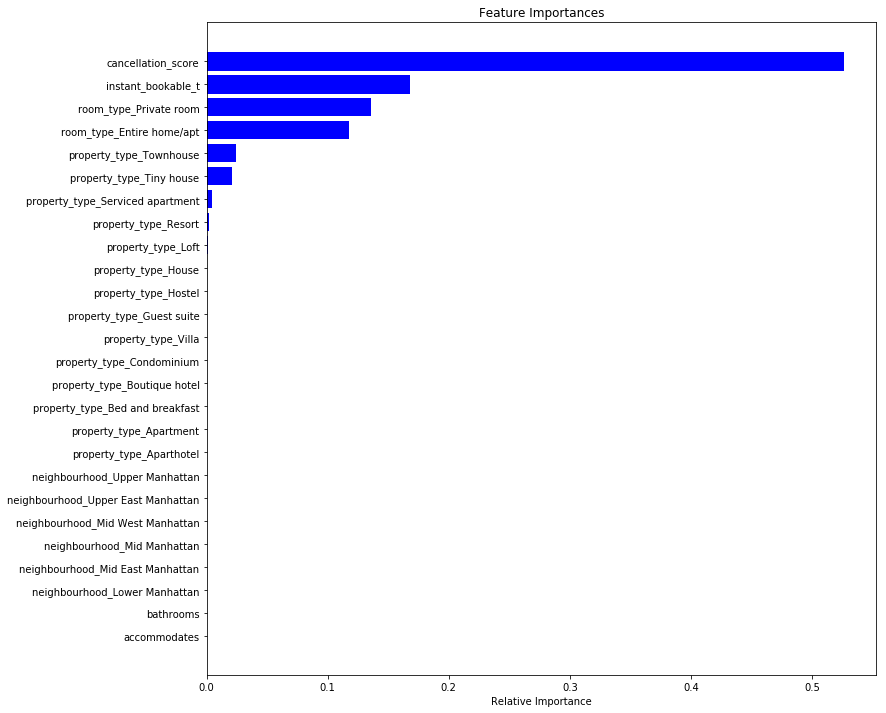

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = model_2.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),feature_names)
plt.xlabel('Relative Importance')

# Random Forest 

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':[10*(i+1) for i in range(10)], #the number of trees
     'max_depth':[2,3,4,5,6,7,8],
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (4,8,12,16)
}
model_3 = GridSearchCV(RandomForestRegressor(),parameters,cv=3,iid=False)
model_3.fit(x_train_1, np.ravel(y_train_1))
model_3.best_score_, model_3.best_params_

(0.4658237962315708,
 {'max_depth': 8,
  'min_samples_leaf': 4,
  'min_samples_split': 4,
  'n_estimators': 50})

In [26]:
from sklearn.ensemble import RandomForestClassifier
parameters = {
     'n_estimators':[10*(i+1) for i in range(10)], #the number of trees
     'max_depth':[2,3,4,5,6,7,8],
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (4,8,12,16)
}
model_4 = GridSearchCV(RandomForestClassifier(),parameters,cv=3,iid=False)
model_4.fit(x_train_2, np.ravel(y_train_2))
model_4.best_score_, model_4.best_params_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


(0.5833655912219672,
 {'max_depth': 8,
  'min_samples_leaf': 4,
  'min_samples_split': 4,
  'n_estimators': 90})